In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb

# データの読み込み
drop_cols = [
    "Publisher", 
    "Pub_Number_of_Generation", 
    "Pub_Game_Num", 
    "Pub_User_Score_Sum", 
    "Pub_Critic_Score_Sum",
    "Pub_PS_rate",
    "Pub_Plat_Num",
    "Pub_Critic_Score_Skew",
    "Pub_Critic_Score_Mean",
    "Pub_Critic_Score_Median",
    "Pub_Critic_Score_Sum",
    "Pub_Critic_Score_Max",
    "Pub_PC_rate",
    "Developer",
]
train = pd.read_csv('X.csv').drop(drop_cols, axis=1)
test = pd.read_csv('test_X.csv').drop(drop_cols, axis=1)

print(train.shape)
print(test.shape)

(8359, 97)
(8360, 97)


In [104]:
train['target'] = 0
test['target'] = 1

merge_df = pd.concat([train[test.columns], test])
merge_df_X = merge_df.drop('target', axis=1)
merge_df_y = merge_df['target']

tra_X, val_X, tra_y, val_y = train_test_split(merge_df_X, merge_df_y, test_size=0.3, shuffle=True, random_state=0)

In [105]:
# lightGBMを用いて二値分類を解く
num_round = 10000
params = {
    'metric': 'auc',
    'objective': 'binary'
    }

train_data = lgb.Dataset(tra_X, tra_y)
valid_data = lgb.Dataset(val_X, val_y)
model = lgb.train(params, train_data,
                num_boost_round=num_round,
                valid_names=["train", "valid"],
                valid_sets=(train_data, valid_data),
                early_stopping_rounds=100,
                verbose_eval=1000
                )


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[391]	train's auc: 0.971989	valid's auc: 0.811453


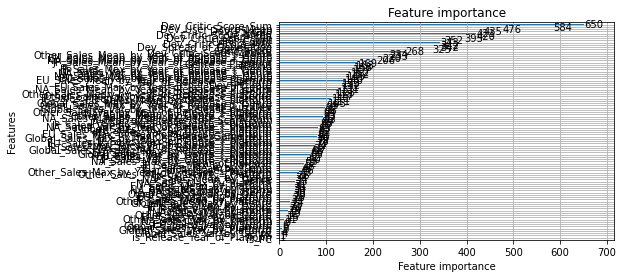

In [106]:
lgb.plot_importance(model)